In [ ]:
# Kode berikut mengimpor berbagai pustaka dan fungsi yang diperlukan untuk membangun dan mengevaluasi Artificial Neural Networks (ANN) di Google Colab.
import numpy as np                              # Mengimpor pustaka NumPy, yang menyediakan alat yang kuat untuk komputasi numerik dan manipulasi array.
import pandas as pd                             # Mengimpor pustaka Pandas, digunakan untuk manipulasi dan analisis data, terutama bekerja dengan data tabular.
from sklearn.preprocessing import MinMaxScaler  # Mengimpor kelas MinMaxScaler dari scikit-learn, digunakan untuk menskalakan fitur numerik ke rentang tertentu
                                                # (biasanya antara 0 dan 1), yang sering membantu meningkatkan kinerja jaringan saraf.
from keras.models import Sequential             # Mengimpor kelas Sequential dari Keras, yang digunakan untuk membangun Artificial Neural Networks (ANN).
from keras.layers import Dense                  # Mengimpor kelas layer Dense dari Keras, yang digunakan untuk membuat layer terhubung sepenuhnya di jaringan.
from keras.optimizers import Adam               # Mengimpor pengoptimal Adam dari Keras, yaitu algoritma optimasi populer yang digunakan untuk melatih jaringan saraf.
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# Mengimpor berbagai metrik evaluasi dari scikit-learn untuk menilai kinerja model yang telah dilatih.
import matplotlib.pyplot as plt                 # Mengimpor pustaka Matplotlib, digunakan untuk membuat visualisasi dan plot.
from math import sqrt                           # Mengimpor fungsi sqrt dari modul matematika, digunakan untuk menghitung akar kuadrat
                                                # (kemungkinan untuk mengevaluasi kesalahan kuadrat akar rata-rata).

In [ ]:
# Kode berikut berfokus pada persiapan data untuk digunakan dalam Artificial Neural Network (ANN). Berikut penjelasannya:
data_rnn = pd.read_csv("https://raw.githubusercontent.com/t0ccata/final-project-ml/main/archive/daily/AALI.csv")
# Kode ini memuat data dari file CSV yang berada di URL yang diberikan. Data ini berisi informasi
# tentang saham AALI, yang termasuk harga pembukaan, harga penutupan, volume perdagangan, dan lain
# sebagainya. Data ini disimpan dalam variabel data_rnn.
data_rnn['timestamp'] = pd.to_datetime(data_rnn['timestamp'])
# Kode ini mengubah kolom timestamp dalam DataFrame menjadi objek datetime menggunakan fungsi pd.to_datetime().
# Ini memungkinkan Anda untuk bekerja dengan data tanggal dan waktu dengan lebih mudah.
data_rnn.set_index('timestamp', inplace=True) # Kode ini menetapkan kolom timestamp sebagai indeks DataFrame.
                                              # Ini memudahkan Anda untuk mengakses data berdasarkan tanggal dan waktu.
data_rnn.head() # Kode ini mencetak lima baris pertama dari DataFrame data_rnn.

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,524,524,547,547,342131
2001-04-17,547,524,571,524,345804
2001-04-18,547,524,547,524,230361
2001-04-19,524,500,524,500,457574
2001-04-20,476,452,476,452,228262


In [ ]:
data_rnn.isna().sum()
# Kode di atas digunakan untuk memeriksa keberadaan data yang hilang (missing data) dalam DataFrame data_rnn. Berikut penjelasannya:
# 1. data_rnn.isna(): Bagian ini menggunakan metode isna() dari DataFrame data_rnn untuk menghasilkan DataFrame baru yang berisi nilai boolean (True/False).
# Nilai True menunjukkan bahwa sel tersebut berisi data yang hilang (missing data), sedangkan nilai False menunjukkan bahwa sel tersebut berisi data yang valid.
# 2.sum(): Metode sum() digunakan untuk menghitung jumlah nilai True di setiap kolom DataFrame yang dihasilkan dari langkah sebelumnya. Ini akan memberi Anda jumlah data yang hilang di setiap kolom.

open      0
low       0
high      0
close     0
volume    0
dtype: int64

In [ ]:
# Kode berikut melakukan proses penskalaan (scaling) pada data DataFrame data_rnn menggunakan MinMaxScaler dari scikit-learn. Berikut penjelasannya:
scaler = MinMaxScaler() # Kode ini menginisialisasi objek MinMaxScaler dari scikit-learn.
                        # MinMaxScaler adalah metode penskalaan yang mengubah data numerik ke dalam rentang tertentu (biasanya antara 0 dan 1).
data_rnn_scaled = scaler.fit_transform(data_rnn)
# Metode fit_transform pertama-tama menyesuaikan (fit) MinMaxScaler ke data data_rnn. Ini berarti bahwa MinMaxScaler akan mempelajari rentang
# minimum dan maksimum dari setiap kolom dalam data_rnn. Kemudian, fit_transform langsung menerapkan transformasi penskalaan ke data data_rnn
# dan mengembalikan DataFrame baru yang telah diskalakan, yang disimpan dalam variabel data_rnn_scaled.

In [ ]:
def create_sequences(data, seq_length):

    # Inisialisasi list untuk menyimpan urutan dan target
    sequences, targets = [], []

    # Iterasi melalui data untuk membuat urutan
    for i in range(len(data) - seq_length):
        # Tambahkan urutan data ke dalam list sequences
        sequences.append(data[i:i + seq_length])
        # Tambahkan nilai target ke dalam list targets
        targets.append(data[i + seq_length, 3])

    # Ubah list sequences dan targets menjadi array NumPy
    return np.array(sequences), np.array(targets)

In [ ]:
seq_length = 60                                                  # Buat urutan data dan target dengan panjang urutan 60
X_train, y_train = create_sequences(data_rnn_scaled, seq_length) # Gunakan nama variabel yang sesuai di sini

In [ ]:
seq_length = 60                                                                   # Buat urutan data dan target dengan panjang urutan 60
sequences, y_train = create_sequences(data_rnn_scaled, seq_length)                # Gunakan nama variabel yang sesuai 'data_rnn_scaled'
sequences = sequences.reshape(sequences.shape[0], seq_length, data_rnn.shape[1])  # Ubah bentuk data urutan untuk model ANN

In [ ]:
!pip install keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Buat model ANN
model = Sequential()

# Tambahkan layer LSTM untuk menangani data deret waktu
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Kompilasi model dengan optimizer Adam dan loss function mean squared error
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Latih model dengan data training
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# Asumsikan 'data_rnn_scaled' berisi data training dan test
# Sesuaikan indeks pemisah berdasarkan data Anda
split_index = int(len(data_rnn_scaled) * 0.8)  # Contoh pemisahan 80/20

# Data training
# Buat urutan data training dan target
data_train = data_rnn_scaled[:split_index]
X_train, y_train = create_sequences(data_train, seq_length)

# Ubah bentuk data training untuk model ANN
X_train = X_train.reshape(X_train.shape[0], seq_length, data_rnn_scaled.shape[1])

# Data test
# Buat urutan data test dan target
data_test = data_rnn_scaled[split_index:]
X_test, y_test = create_sequences(data_test, seq_length)

# Ubah bentuk data test untuk model ANN
X_test = X_test.reshape(X_test.shape[0], seq_length, data_rnn_scaled.shape[1])

In [ ]:
# Buat prediksi untuk training data
train_predictions = model.predict(X_train)

# Buat prediksi untuk test data
test_predictions = model.predict(X_test)

# Ubah bentuk 'train_predictions' dan 'test_predictions' menjadi dua dimensi
train_predictions = train_predictions.reshape(-1, 1)
test_predictions = test_predictions.reshape(-1, 1)

# Gabungkan prediksi training dan test serta nilai aktual
combined_train_test_predictions = np.concatenate((train_predictions, test_predictions), axis=0)
combined_train_test_actual = np.concatenate((y_train, y_test), axis=0)

34/34 [==============================] - 0s 10ms/step


In [ ]:
# Import required libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.optimizers import Adam

# Split the data into train, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Normalize the data after the train-test split
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# Compile the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_normalized, y_train, validation_data=(X_val_normalized, y_val))

# Evaluate the model on the validation data
val_predictions = model.predict(X_val_normalized)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_mape = mean_absolute_percentage_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

# Evaluate the model on the test data
test_predictions = model.predict(X_test_normalized)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Evaluate the model overall
overall_predictions = np.concatenate((val_predictions, test_predictions), axis=0)
overall_actual = np.concatenate((y_val, y_test), axis=0)
overall_mse = mean_squared_error(overall_actual, overall_predictions)
overall_rmse = np.sqrt(overall_mse)
overall_mape = mean_absolute_percentage_error(overall_actual, overall_predictions)
overall_r2 = r2_score(overall_actual, overall_predictions)

# Print the results
print(f'Validation MSE: {val_mse:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')
print(f'Validation MAPE: {val_mape:.4f}')
print(f'Validation R-squared: {val_r2:.4f}')
print()
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAPE: {test_mape:.4f}')
print(f'Test R-squared: {test_r2:.4f}')
print()
print(f'Overall MSE: {overall_mse:.4f}')
print(f'Overall RMSE: {overall_rmse:.4f}')
print(f'Overall MAPE: {overall_mape:.4f}')
print(f'Overall R-squared: {overall_r2:.4f}')

36/36 [==============================] - 0s 5ms/step
Validation MSE: 1001559.1504
Validation RMSE: 1000.7793
Validation MAPE: 0.2997
Validation R-squared: 0.9826

Test MSE: 1025383.1788
Test RMSE: 1012.6121
Test MAPE: 0.3090
Test R-squared: 0.9831

Overall MSE: 1013471.1646
Overall RMSE: 1006.7130
Overall MAPE: 0.3043
Overall R-squared: 0.9828


In [ ]:
# Membuat prediksi
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Mengembalikan prediksi ke skala asli
train_predictions_scaled = np.zeros((train_predictions.shape[0], 5))
train_predictions_scaled[:, 3] = train_predictions.flatten()
train_predictions = scaler.inverse_transform(train_predictions_scaled)[:, 3]

34/34 [==============================] - 0s 14ms/step


In [ ]:
# Buat array kosong untuk menyimpan prediksi yang sudah di-scaled
test_predictions_scaled = np.zeros((test_predictions.shape[0], 5))

# Isi kolom ke-4 dari array dengan prediksi yang sudah di-flatten
test_predictions_scaled[:, 3] = test_predictions.flatten()

# Transformasi balik prediksi yang sudah di-scaled menggunakan scaler
test_predictions = scaler.inverse_transform(test_predictions_scaled)[:, 3]

In [ ]:
# Menghitung metrik pada data yang sudah dinormalisasi
# Buat array kosong untuk menyimpan nilai target yang sudah di-scaled
y_train_scaled = np.zeros((y_train.shape[0], 5))

# Isi kolom ke-4 dari array dengan nilai target
y_train_scaled[:, 3] = y_train

# Transformasi balik nilai target yang sudah di-scaled menggunakan scaler
y_train_actual = scaler.inverse_transform(y_train_scaled)[:, 3]

In [ ]:
# Hitung metrik pada data yang sudah di-denormalisasi
# Hitung MSE (Mean Squared Error) dengan data yang sudah di-denormalisasi
mse_denormalized = mean_squared_error(y_test_actual, test_predictions)

# Hitung MAPE (Mean Absolute Percentage Error) dengan data yang sudah di-denormalisasi
mape_denormalized = mean_absolute_percentage_error(y_test_actual, test_predictions)

# Hitung R-squared (R2) dengan data yang sudah di-denormalisasi
r2_denormalized = r2_score(y_test_actual, test_predictions)

# Cetak metrik yang sudah di-denormalisasi
print(f'Denormalized Data Metrics:')
print(f'MSE: {mse_denormalized}')
print(f'MAPE: {mape_denormalized}')
print(f'R2 Score: {r2_denormalized}')

Denormalized Data Metrics:
MSE: 69602.12329040296
MAPE: 0.019142253358716565
R2 Score: 0.9795820441495664


In [ ]:
# Hitung metrik pada data yang sudah di-denormalisasi
mse_denormalized = mean_squared_error(y_test_actual, test_predictions)
mape_denormalized = mean_absolute_percentage_error(y_test_actual, test_predictions)
r2_denormalized = r2_score(y_test_actual, test_predictions)
print(f'Denormalized Data Metrics:')
print(f'MSE: {mse_denormalized}')
print(f'MAPE: {mape_denormalized}')
print(f'R2 Score: {r2_denormalized}')

Denormalized Data Metrics:
MSE: 69602.12329040296
MAPE: 0.019142253358716565
R2 Score: 0.9795820441495664


36/36 [==============================] - 0s 3ms/step


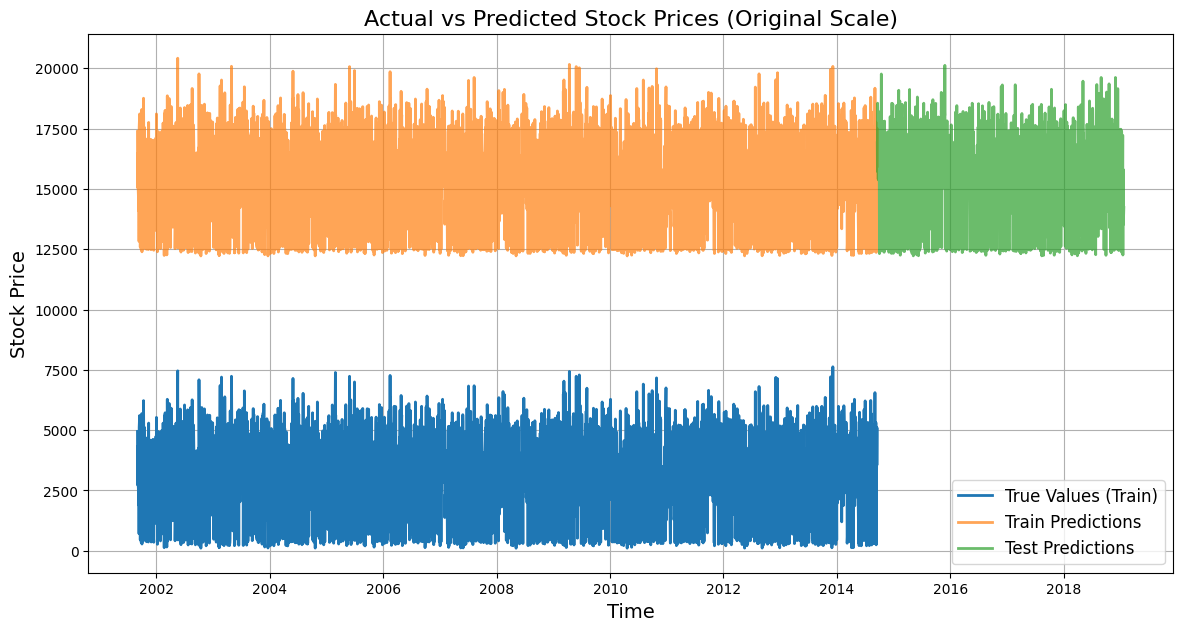

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ganti 'your_stock_data.csv' dengan path yang benar ke file Anda
file_path = 'https://raw.githubusercontent.com/t0ccata/final-project-ml/main/archive/daily/AALI.csv'

# Membaca DataFrame
df = pd.read_csv(file_path)

# Mengubah kolom 'timestamp' menjadi format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Menjadikan 'timestamp' sebagai index
df = df.set_index('timestamp')

# Berasumsi 'df' adalah DataFrame containing your stock data, replace 'data_rnn' with 'df'
# Jika Anda menggunakan nama DataFrame yang berbeda, ganti dengan nama yang sesuai.

# Tentukan nilai untuk seq_length. Ganti 100 dengan panjang sequence yang sesuai.
seq_length = 100

# Buat prediksi untuk training data
train_predictions = model.predict(X_train)

# Buat prediksi untuk test data
test_predictions = model.predict(X_test)

# Ubah bentuk 'train_predictions' dan 'test_predictions' menjadi dua dimensi
train_predictions = train_predictions.reshape(-1, 1)
test_predictions = test_predictions.reshape(-1, 1)

# Gabungkan prediksi training dan test serta nilai aktual
combined_train_test_predictions = np.concatenate((train_predictions, test_predictions), axis=0)
combined_train_test_actual = np.concatenate((y_train, y_test), axis=0)

# Menghitung metrik pada data yang sudah dinormalisasi
# Buat array kosong untuk menyimpan nilai target yang sudah di-scaled
y_train_scaled = np.zeros((y_train.shape[0], 5))

# Isi kolom ke-4 dari array dengan nilai target
y_train_scaled[:, 3] = y_train

# Transformasi balik nilai target yang sudah di-scaled menggunakan scaler
y_train_actual = scaler.inverse_transform(y_train_scaled)[:, 3]

# Memplot hasil prediksi
# Buat figure dengan ukuran 14x7
plt.figure(figsize=(14, 7))

# Tampilkan legenda
plt.legend(fontsize=12)

# Plot nilai target sebenarnya (train)
plt.plot(df.index[seq_length:seq_length + len(y_train_actual)], y_train_actual, label='True Values (Train)', linewidth=2)

# Plot prediksi train
plt.plot(df.index[seq_length:seq_length + len(train_predictions)], train_predictions, label='Train Predictions', alpha=0.7, linewidth=2)

# Plot prediksi test
plt.plot(df.index[seq_length + len(train_predictions):seq_length + len(train_predictions) + len(test_predictions)], test_predictions, label='Test Predictions', alpha=0.7, linewidth=2)

# Tampilkan legenda
plt.legend(fontsize=12)

# Set judul plot
plt.title('Actual vs Predicted Stock Prices (Original Scale)', fontsize=16)

# Atur label sumbu x dan y
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)

# Tampilkan grid
plt.grid(True)

# Tampilkan plot
plt.show()

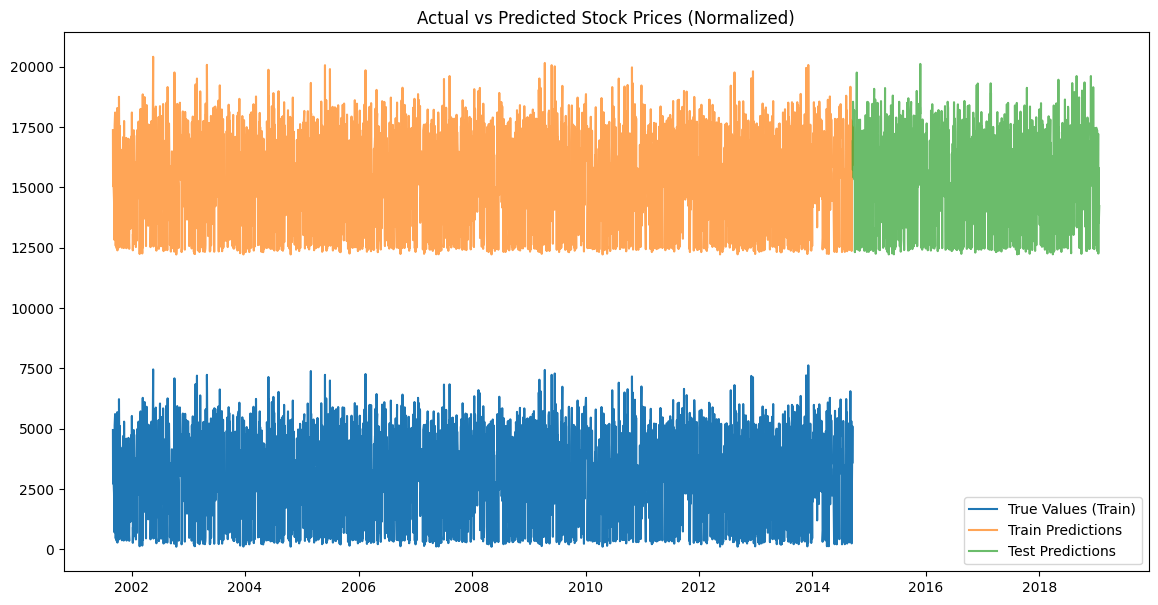

In [ ]:
import matplotlib.pyplot as plt

# Memplot hasil prediksi (data ternormalisasi)
# Buat figure dengan ukuran 14x7
plt.figure(figsize=(14, 7))

# Plot nilai target sebenarnya (train)
plt.plot(df.index[seq_length:seq_length + len(y_train_actual)], y_train_actual, label='True Values (Train)')

# Plot prediksi train
plt.plot(df.index[seq_length:seq_length + len(train_predictions)], train_predictions, label='Train Predictions', alpha=0.7)

# Plot nilai target sebenarnya (test) - Pastikan 'y_test_actual' sudah didefinisikan dan memiliki panjang yang sesuai
# plt.plot(df.index[seq_length + len(y_train_actual):], y_test_actual, label='True Values (Test)')

# Plot prediksi test
plt.plot(df.index[seq_length + len(train_predictions):seq_length + len(train_predictions) + len(test_predictions)], test_predictions, label='Test Predictions', alpha=0.7)

# Tampilkan legenda
plt.legend()

# Set judul plot
plt.title('Actual vs Predicted Stock Prices (Normalized)')

# Tampilkan plot
plt.show()